<a href="https://colab.research.google.com/github/konstanyman/ItDL_HW1/blob/main/ItDL_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building a Convolutional Neural Network (CNN)
*Building a CNN to classify images from CIFAR-100 dataset and testing its performance.*



In [1]:
# imports
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import random
from keras.optimizers import Nadam

## Downloading and preparing image data

In [2]:
# load data
(train_images, train_labels), (test_images, test_labels) = datasets.cifar100.load_data()


### get subset of first ten classes and 100 training images and 20 testing images

# Initialize lists to store the selected indices for each class
train_indices = []
test_indices = []

# Select 100 training images and 20 testing images for each class
for class_label in range(10):
    class_train_indices = np.where(train_labels.flatten() == class_label)[0][:100]
    class_test_indices = np.where(test_labels.flatten() == class_label)[0][:20]

    train_indices.extend(class_train_indices)
    test_indices.extend(class_test_indices)

# Extract the subset based on the selected indices
train_images = train_images[train_indices]
train_labels = train_labels[train_indices]
test_images = test_images[test_indices]
test_labels = test_labels[test_indices]

# Print the shapes of the subset
print("Subset shape - Training Set: Images:", train_images.shape, " Labels:", train_labels.shape)
print("Subset shape - Testing Set: Images:", test_images.shape, " Labels:", test_labels.shape)

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# define label_names (list taken and edited from GitHub keras thread: https://github.com/keras-team/keras/issues/2653 )
label_names = ['apple', 'aquarium fish', 'baby', 'bear', 'beaver',
               'bed', 'bee', 'beetle', 'bicycle', 'bottle']

Subset shape - Training Set: Images: (1000, 32, 32, 3)  Labels: (1000, 1)
Subset shape - Testing Set: Images: (200, 32, 32, 3)  Labels: (200, 1)


## Verify data
Plot a few random images and their corresponding labels.

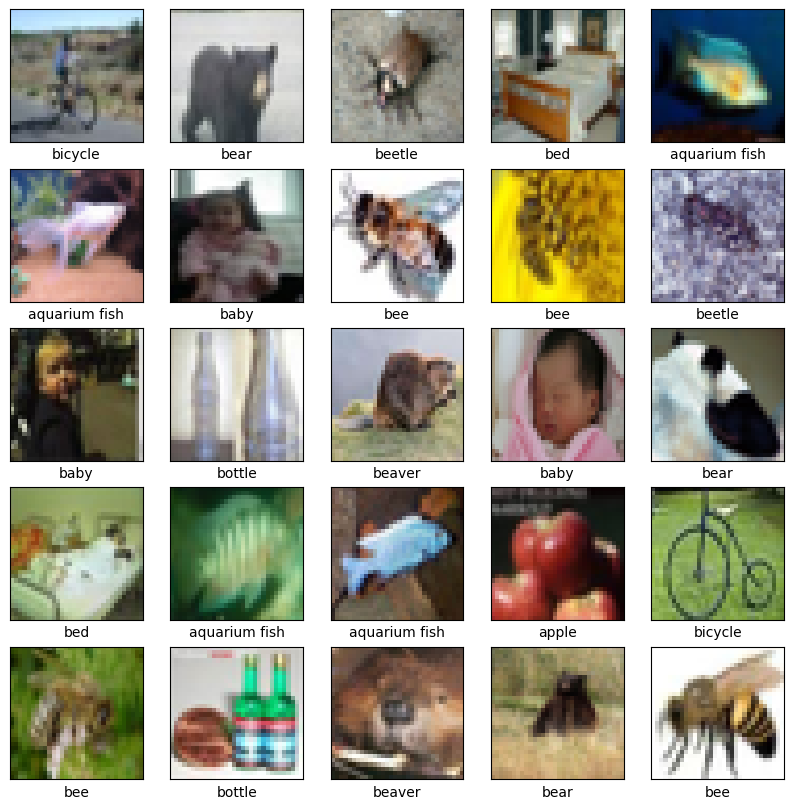

In [3]:
plt.figure(figsize=(10,10))
j = 1
for i in random.sample(range(0, 1000), 25):
    plt.subplot(5,5,j)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(label_names[train_labels[i][0]])
    j += 1
plt.show()

## Building the model

### Convolutional base with convolutional and max pooling layers

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))) #configure input shape
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2DTranspose(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(254, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

### Inner dense layers

In [5]:
model.add(layers.Flatten())
model.add(layers.Dense(254, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_transpose (Conv2DTr  (None, 17, 17, 128)       36992     
 anspose)                                                        
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 254)         292862    
                                                        

## Compiling and training the model

In [7]:
optimizer = Nadam(learning_rate=0.001)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=25, batch_size=64,
                    validation_data=(test_images, test_labels))

Epoch 1/25
16/16 [==============================] - 12s 320ms/step - loss: 2.2677 - accuracy: 0.1450 - val_loss: 2.1724 - val_accuracy: 0.1900
Epoch 2/25
16/16 [==============================] - 5s 333ms/step - loss: 2.1351 - accuracy: 0.2170 - val_loss: 1.9241 - val_accuracy: 0.3350
Epoch 3/25
16/16 [==============================] - 4s 262ms/step - loss: 1.8683 - accuracy: 0.3650 - val_loss: 1.6832 - val_accuracy: 0.4250
Epoch 4/25
16/16 [==============================] - 4s 264ms/step - loss: 1.6546 - accuracy: 0.4260 - val_loss: 1.5750 - val_accuracy: 0.4250
Epoch 5/25
16/16 [==============================] - 5s 338ms/step - loss: 1.4834 - accuracy: 0.4830 - val_loss: 1.7749 - val_accuracy: 0.3900
Epoch 6/25
16/16 [==============================] - 4s 259ms/step - loss: 1.4111 - accuracy: 0.5030 - val_loss: 1.4378 - val_accuracy: 0.5500
Epoch 7/25
16/16 [==============================] - 4s 259ms/step - loss: 1.2156 - accuracy: 0.5840 - val_loss: 1.3639 - val_accuracy: 0.5400
Epoch

## Evaluate the model

7/7 - 0s - loss: 2.3668 - accuracy: 0.6000 - 238ms/epoch - 34ms/step


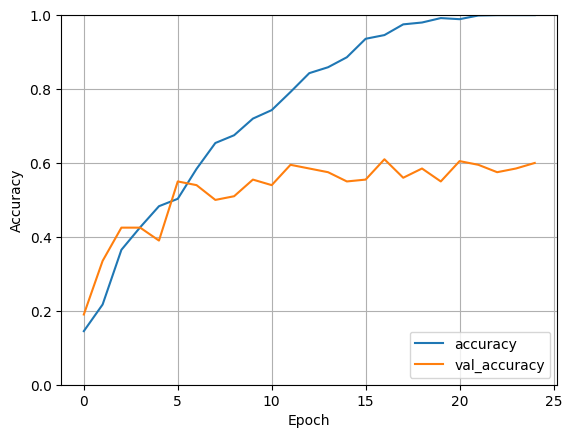

In [8]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [9]:
print(f"Test accuracy: {test_acc}")

Test accuracy: 0.6000000238418579


## Reference
Learning Multiple Layers of Features from Tiny Images, Alex Krizhevsky, 2009.